**make_* functions**:

1. `make_regression`: Generate a random regression problem.
2. `make_classification`: Generate a random classification problem.
3. `make_blobs`: Generate isotropic Gaussian blobs for clustering.
4. `make_moons`: Generate two interleaving half circles.
5. `make_circles`: Generate circles for binary classification.
6. `make_s_curve`: Generate an S curve dataset.
7. `make_swiss_roll`: Generate a swiss roll dataset.
8. `make_checkerboard`: Generate a checkerboard dataset.
9. `make_sparse_coded_signal`: Generate a signal as a sparse combination of dictionary elements.
10. `make_sparse_uncorrelated`: Generate a random regression problem with sparse uncorrelated design.
11. `make_spd_matrix`: Generate a random symmetric, positive definite matrix.
12. `make_low_rank_matrix`: Generate a mostly low rank matrix with bell-shaped singular values.
13. `make_sparse_spd_matrix`: Generate a sparse symmetric positive definite matrix.
14. `make_gaussian_quantiles`: Generate isotropic Gaussian and label samples by quantile.
15. `make_multilabel_classification`: Generate a random multilabel classification problem.
16. `make_regression`: Generate a random regression problem.

**load_* functions**:

1. `load_boston`: Load and return the boston house-prices dataset.
2. `load_iris`: Load and return the iris dataset.
3. `load_diabetes`: Load and return the diabetes dataset.
4. `load_digits`: Load and return the digits dataset.
5. `load_linnerud`: Load and return the linnerud dataset.
6. `load_wine`: Load and return the wine dataset.
7. `load_breast_cancer`: Load and return the breast cancer wisconsin dataset.

### 1. make_circles

In [ ]:
# import required libraries
import torch
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# setting up the divice agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'device: {device}\nversion of PyTorch: {torch.__version__}')

device: cpu
version of PyTorch: 2.2.1+cu121


In [ ]:
# getting the data from sklearn.datasets and converting them into tensors
X, y = sklearn.datasets.make_circles(n_samples = 1000,
                                    random_state = 42,
                                     noise = 0.04)
print(len(X), len(y))
print(f'shape of X: {X.shape}, y: {y.shape}')

X = torch.from_numpy(X).to(device).type(torch.float)
y = torch.from_numpy(y).to(device).type(torch.float)
print(f'type of X: {type(X)}, y: {type(y)}')

1000 1000
shape of X: (1000, 2), y: (1000,)
type of X: <class 'torch.Tensor'>, y: <class 'torch.Tensor'>


In [ ]:
# use sklearn.model_selection.train_test_split for splitting for data into training and testing
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                           y,
                                                                           test_size = 0.2,
                                                                           random_state = 42)
print(f'length of train data: {len(X_test)} and length of test data: {len(X_train)}')
print(f'0th sample of train data:\nX[0]: {X[0]}\ny[0]: {y[0]}')

length of train data: 200 and length of test data: 800
0th sample of train data:
X[0]: tensor([0.7482, 0.2391])
y[0]: 1.0


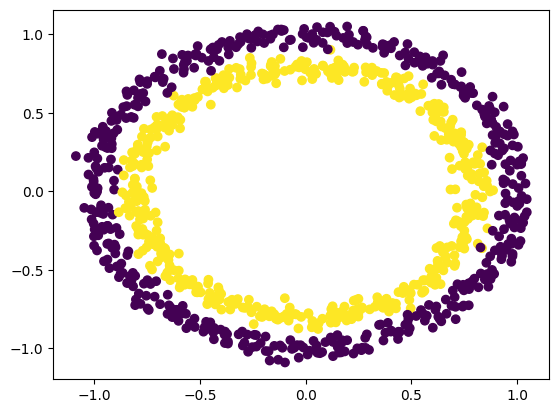

In [ ]:
# plotting the data
plt.scatter(x = X[:,0],
         y = X[:,1],
         c = y)

In [ ]:
# Creating the model class
class ModelCirclesV0(torch.nn.Module):
  def __init__(self):
    super().__init__()

    # layers and activation function information
    self.layer_1 = torch.nn.Linear(in_features = 2, out_features = 16)
    self.layer_2 = torch.nn.Linear(in_features = 16, out_features = 16)
    self.layer_3 = torch.nn.Linear(in_features = 16, out_features = 1)
    self.activation = torch.nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.activation(self.layer_2(self.activation(self.layer_1(x)))))

model_0 = ModelCirclesV0()
# putting the model on the target device
model_0.to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2917,  0.0371],
                      [-0.4601,  0.1870],
                      [-0.4969,  0.1434],
                      [-0.5670, -0.6806],
                      [ 0.5145,  0.6223],
                      [ 0.4374, -0.2920],
                      [ 0.5706,  0.2659],
                      [-0.2416, -0.2362],
                      [-0.1900, -0.4767],
                      [ 0.3414,  0.3710],
                      [ 0.2988, -0.3836],
                      [-0.4840,  0.1093],
                      [-0.3931, -0.2399],
                      [ 0.5137,  0.1623],
                      [-0.3089,  0.3593],
                      [ 0.1205,  0.2953]])),
             ('layer_1.bias',
              tensor([-0.4959,  0.3967,  0.6289,  0.0770,  0.2132,  0.0693,  0.1969,  0.2618,
                      -0.3004,  0.3329, -0.4182,  0.6822,  0.5854,  0.5758, -0.6481, -0.6606])),
             ('layer_2.weight',
              tensor([[ 0.0474,  0.1935,

In [ ]:
# choose loss function and an optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

In [ ]:
# passing the test data to model_0
model_0.eval()
with torch.inference_mode():
  y_pred_temp = model_0(X_test)

print(f'shape of y_pred_temp: {y_pred_temp.shape}')
# test prediction
print(type(y_pred_temp))
print("raw outpust of from model_0")
print(y_pred_temp[:10])

print("passing the raw values from model_0 to sigmoid function")
temp1 = torch.sigmoid(y_pred_temp)
print(temp1[:10])

print("rounding the sigmoid values to get the class values")
print(torch.round(temp1)[:10])

# loss must be calculated with the raw values form model i.e. raw logits from the model and accuracy should be compared with the rounded sigmoid values of the raw logits.

shape of y_pred_temp: torch.Size([200, 1])
<class 'torch.Tensor'>
raw outpust of from model_0
tensor([[-0.1816],
        [-0.2146],
        [-0.1292],
        [-0.1995],
        [-0.2322],
        [-0.2395],
        [-0.2041],
        [-0.2130],
        [-0.1255],
        [-0.2157]])
passing the raw values from model_0 to sigmoid function
tensor([[0.4547],
        [0.4465],
        [0.4677],
        [0.4503],
        [0.4422],
        [0.4404],
        [0.4491],
        [0.4469],
        [0.4687],
        [0.4463]])
rounding the sigmoid values to get the class values
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
# install torchmetrics
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task = 'binary', num_classes = 2).to(device)

# # Creatng own accuracy function
# def accuracy_fn(y_true, y_pred):
#   correct = int(torch.eq(y_true, y_pred).sum())
#   return (correct/len(y_true))*100

In [ ]:
epochs = 1000

for epoch in range(epochs):
  # put the model into training mode
  model_0.train()

  # forward pass
  y_pred_logits = model_0(X_train).squeeze()
  y_sigmoid = torch.sigmoid(y_pred_logits)
  y_pred = torch.round(y_sigmoid)

  # calculate the loss and accuracy
  train_loss = loss_fn(y_pred_logits, y_train)
  train_accuracy = accuracy_fn(y_pred,y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward(backpropagation)
  train_loss.backward()

  # optimizer step
  optimizer.step()

  # evaluation loop for every 10 epochs
  if epoch % 100 == 0:
    # put the model to evaluation mode
    model_0.eval()
    with torch.inference_mode():
      y_eval_logits = model_0(X_test).squeeze()
      y_eval_sigmoid = torch.sigmoid(y_eval_logits)
      y_eval = torch.round(y_eval_sigmoid)

      test_loss = loss_fn(y_eval_logits, y_test)
      test_accuracy = accuracy_fn(y_eval,y_test)
    print(f'epoch: {epoch} | train loss: {train_loss} | train accuracy: {train_accuracy} | test loss: {test_loss} | test accuracy: {test_accuracy}')

epoch: 0 | train loss: 0.6989361643791199 | train accuracy: 0.5 | test loss: 0.6972583532333374 | test accuracy: 0.5
epoch: 100 | train loss: 0.691908061504364 | train accuracy: 0.5174999833106995 | test loss: 0.6923049688339233 | test accuracy: 0.4950000047683716
epoch: 200 | train loss: 0.6885087490081787 | train accuracy: 0.550000011920929 | test loss: 0.6905720233917236 | test accuracy: 0.47999998927116394
epoch: 300 | train loss: 0.6831545233726501 | train accuracy: 0.6412500143051147 | test loss: 0.6873215436935425 | test accuracy: 0.5799999833106995
epoch: 400 | train loss: 0.6760457754135132 | train accuracy: 0.6424999833106995 | test loss: 0.6829993724822998 | test accuracy: 0.5849999785423279
epoch: 500 | train loss: 0.6649793982505798 | train accuracy: 0.6512500047683716 | test loss: 0.675839900970459 | test accuracy: 0.6150000095367432
epoch: 600 | train loss: 0.6464059352874756 | train accuracy: 0.6850000023841858 | test loss: 0.6625110507011414 | test accuracy: 0.62999999

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


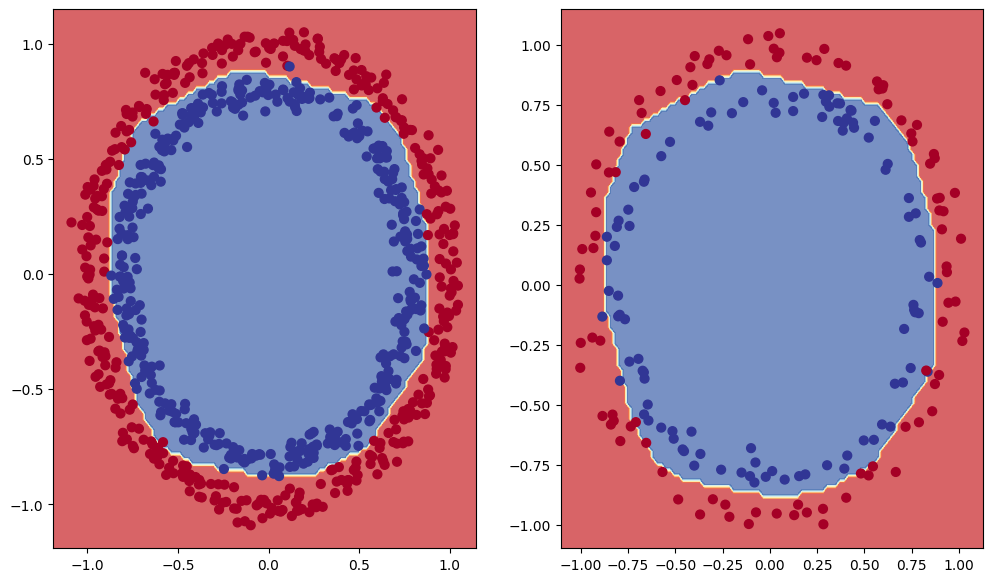

In [ ]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_0, X_test, y_test)